In [10]:
# import packages
import time
from datetime import timedelta, datetime, date

from os.path import join
import os
from os import listdir
from os.path import isfile, join
import csv

import numpy as np
import numpy.matlib
import pandas as pd

import io
from runeq import Config, stream

import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline

'''
Download runeq, via Terminal: pip install runeq 
Rune instructions: https://github.com/rune-labs/opensource/blob/master/jupyter-notebook-templates/00_python_installation_instructions.md
documentation Rune functions: https://github.com/rune-labs/opensource/blob/master/jupyter-notebook-templates/02_download_watch_data.ipynb
'''


'\nDownload runeq, via Terminal: pip install runeq \nRune instructions: https://github.com/rune-labs/opensource/blob/master/jupyter-notebook-templates/00_python_installation_instructions.md\ndocumentation Rune functions: https://github.com/rune-labs/opensource/blob/master/jupyter-notebook-templates/02_download_watch_data.ipynb\n'

In [2]:
path="/Users/jeroenhabets/Desktop/SF data/test download/"
os.chdir(path)

In [3]:
# set up config for Rune watch data extraction

'''
Config files are patient and user specific. Open yaml-files to enter personal client key and access key.
To get keys: log in in Rune-labs as admin; click edit-pencil next to patients name;
go to Clients; make new Client; copy keys to yaml-file
'''

cfg_RCS02 = Config('/Users/jeroenhabets/Desktop/python_code/UCSF_project/rune_Jeroen_watch_config_RCS02.yaml')
cfg_RCS05 = Config('/Users/jeroenhabets/Desktop/python_code/UCSF_project/rune_Jeroen_watch_config_RCS05.yaml')
cfg_RCS06 = Config('/Users/jeroenhabets/Desktop/python_code/UCSF_project/rune_Jeroen_watch_config_RCS06.yaml')
cfg_RCS07 = Config('/Users/jeroenhabets/Desktop/python_code/UCSF_project/rune_Jeroen_watch_config_RCS07.yaml')



clients = {'RCS02' : stream.V1Client(cfg_RCS02), 
           'RCS05' : stream.V1Client(cfg_RCS05),
          'RCS06': stream.V1Client(cfg_RCS06),
          'RCS07': stream.V1Client(cfg_RCS07)}






In [4]:
## RUNE FUNCTIONS (https://github.com/rune-labs/opensource/blob/master/jupyter-notebook-templates/02_download_watch_data.ipynb)
# https://docs.runelabs.io/#tag/v1accel/paths/~1v1~1accel.json/get
'''
in get_accel: expression = "user", to get accelerometry data filtered for gravity direct from Apple-watch
'''
scoreResolution = 60 # enter desired resolution of tremor and dyskinesia scores in seconds

def get_data_download_dir():
    download_path = "/Users/jeroenhabets/Desktop/SF data/test download/"
    return download_path

def make_full_df(accessor):
    '''Loop through pages of API calls and append to a single dataframe'''
    
    df = pd.DataFrame()
    for page in accessor.iter_csv_text():
        page_df = pd.read_csv(io.StringIO(page))
        df = df.append(page_df, ignore_index=True)

    return df

def get_accel(client, params, save_filepath):
    '''Makes API calls for accel data, saves to CSV and outputs dataframe
    expression=user takes data without gravity from watch'''

    accessor = client.Accel(**params, expression= "user" )
    df = make_full_df(accessor)
    
    # save dataframe to a csv
    df.to_csv(save_filepath, index=False)
    
    return df

def get_rotation(client, params, save_filepath):
    '''Makes API calls for rotation data, saves to CSV and outputs dataframe'''

    accessor = client.Rotation(**params)
    df = make_full_df(accessor)
    
    # save dataframe to a csv
    df.to_csv(save_filepath, index=False)
    
    return df

def get_tremor(client, params, save_filepath):
    '''Makes API calls for tremor data, saves to CSV and outputs dataframe
    add: 'page_size=10000' for multiple day downloading '''

    accessor = client.ProbabilitySymptom(symptom='tremor', severity='*', **params, resolution=scoreResolution) # resolution is time interval in sec between points
    df = make_full_df(accessor)
    
    # save dataframe to a csv
    df.to_csv(save_filepath, index=False)
    
    return df

def get_dyskinesia(client, params, save_filepath):
    '''Makes API calls for dyskinesia data, saves to CSV and outputs dataframe
    resolution sets number of seconds between two returned points'''

    accessor = client.ProbabilitySymptom(symptom='dyskinesia', **params, resolution=scoreResolution) # resolution is time interval in sec between points
    df = make_full_df(accessor)
    
    # save dataframe to a csv
    df.to_csv(save_filepath, index=False)
    
    return df

In [5]:
# define download parameters per patient
# device_ids are ID's for patient's Applewatches

# take all days in one download with broad start and end times
d = datetime(2020,5,1) # year,month,day
start = time.mktime(d.timetuple()) #1577865600, is equivalent to: 01/01/2020 @ 12:00am (UTC)
# use current time as end time
# d = datetime.now()
d = datetime(2020,5,15) # year,month,day
end = time.mktime(d.timetuple()) # convert to unix time


downloadParameters = {}

# RCS02
downloadParameters['RCS02'] = {'device_id': 'S9Nj2M1Q', 'start_time': start,
                                 'end_time': end, 'timestamp': 'unix'}
# RCS05
downloadParameters['RCS05'] = {'device_id': 'fkFVvXvO', 'start_time': start,
                                 'end_time': end, 'timestamp': 'unix'}
# RCS06
downloadParameters['RCS06'] = { 'device_id': 'CWTFFG3f',  'start_time': start,
                                 'end_time': end, 'timestamp': 'unix'}
# RCS07
downloadParameters['RCS07'] = {'device_id': '0Z48CCdv', 'start_time': start,
                                 'end_time': end, 'timestamp': 'unix'}



In [6]:
## Call function to download and save csv's for accelerometry, tremor and dyskinesia scores, per patient
'''
Current saving is one folder, files named per patient and per data-type.
'''
data_dir = get_data_download_dir();

for pt in ['RCS02','RCS05','RCS06','RCS07']:
    get_tremor(clients[pt], downloadParameters[pt], os.path.join(data_dir,'%s_tremor.csv' % pt))
    get_dyskinesia(clients[pt], downloadParameters[pt], os.path.join(data_dir,'%s_dyskinesia.csv' % pt))
#     get_accel(clients[pt], downloadParameters[pt], os.path.join(data_dir,'%s_useraccel.csv' % pt)




APIError: 500 InternalServerError: {'message': 'Something inconceivable happened. Please retry', 'type': 'InternalServerError'}

In [ ]:
def combineTremorDyskinesiaScores(pt):
    """
    Input: pt : pt name as string
    
    dyskinesia comes with columns: [time, probability]
    tremor comes with columns: ['time', 'mild', 'moderate', 'none', 'slight', 'strong', 'unknown']
    
    returns dictionary of combined scores for patient
    """
        
    # DYSKINESIA PART
    # read csv file
    dyskinesiaFile = pd.read_csv(path+'%s_dyskinesia.csv' % pt , header=0).dropna().reset_index(drop=True) 

    timeStamps = []
    # take for every row the datetime and transofrm it to pd.Timestamp
    for row in np.arange(dyskinesiaFile.shape[0]):
        timeStamps.append(pd.Timestamp(datetime.fromtimestamp(dyskinesiaFile['time'][row])))
    # insert list with pd.Timestamp's as first column
    dyskinesiaFile.insert(loc=0, column='timeStamp', value=timeStamps)
    # delete original column with float-timestamps
    del(dyskinesiaFile['time'])
    dyskinesiaFile = dyskinesiaFile.rename(columns={'probability': 'dyskinesia'})

     ### TREMOR PART
    # read csv file
    tremorFile = pd.read_csv(path+'%s_tremor.csv' % pt , header=0).dropna().reset_index(drop=True) 

    timeStamps = []
    # take for every row the datetime and transofrm it to pd.Timestamp
    for row in np.arange(tremorFile.shape[0]):
        timeStamps.append(pd.Timestamp(datetime.fromtimestamp(tremorFile['time'][row])))
    # insert list with pd.Timestamp's as first column
    tremorFile.insert(loc=0, column='timeStamp', value=timeStamps)
    # delete original column with float-timestamps
    del(tremorFile['time'])
    for col in tremorFile.keys()[1:]:
        tremorFile = tremorFile.rename(columns={col: 'tremor_'+col})



#     ### merging synchronised on timestamps
    mergedFile = pd.merge_asof(tremorFile, dyskinesiaFile, on='timeStamp').reset_index(drop=True)
    mergedFile.to_csv('/Users/jeroenhabets/Desktop/SF data/test download/%s_totalWatchScores.csv' % pt, index=False)

    return mergedFile
        
        
        
        

In [ ]:
# Call function to load and merge tremor and dyskinesia scores per patient 

watchScores = {} # create one dict which stores dataframes with scores per patient
for pt in ['RCS02','RCS05','RCS06','RCS07']:
    watchScores[pt] = combineTremorDyskinesiaScores(pt)
    

## Working code to download files per patient, per test day

In [ ]:
# download parameters Rune watch data

### APPLE-WATCH, WRIST ACCELEROMETRY ###

# add 'expression':"user", to get filtered acc without gravity component from Applewatch
wristDownloadPms = {}
wristDownloadPms['RCS02'] = {}
wristDownloadPms['RCS05'] = {}
wristDownloadPms['RCS06'] = {}
wristDownloadPms['RCS07'] = {}

# RCS02
wristDownloadPms['RCS02']['14May'] = {'device_id': 'S9Nj2M1Q', 'start_time': 1589468646.68,
                                 'end_time': 1589490755.46, 'timestamp': 'unix'}
# RCS05
wristDownloadPms['RCS05']['30Apr'] = {'device_id': 'fkFVvXvO', 'start_time': 1588262006.852,
                                 'end_time': 1588304559.314, 'timestamp': 'unix'}
wristDownloadPms['RCS05']['05May'] = {'device_id': 'fkFVvXvO', 'start_time': 1588692896.788,
                                 'end_time': 1588720093.361, 'timestamp': 'unix'}
wristDownloadPms['RCS05']['13May'] = {'device_id': 'fkFVvXvO', 'start_time': 1589387426.98,
                                 'end_time': 1589422301.498, 'timestamp': 'unix'}
# RCS06
wristDownloadPms['RCS06']['05May'] = {'device_id': 'CWTFFG3f', 'start_time': 1588709825.267,
                                 'end_time': 1588741647.109, 'timestamp': 'unix'}
wristDownloadPms['RCS06']['06May'] = { 'device_id': 'CWTFFG3f',  'start_time': 1588784847.109,
                                 'end_time': 1588807603.426, 'timestamp': 'unix'}
# RCS07
wristDownloadPms['RCS07']['07May'] = {'device_id': '0Z48CCdv', 'start_time': 1588867916.916,
                                 'end_time': 1588903716.488, 'timestamp': 'unix'}




### RCS, AXIAL ACCELEROMETRY ###

# device ID for right-RCS
# RCS-data always including gravity component
axialDownloadPms = {}
axialDownloadPms['RCS02'] = {}
axialDownloadPms['RCS05'] = {}
axialDownloadPms['RCS06'] = {}
axialDownloadPms['RCS07'] = {}

# RCS02
axialDownloadPms['RCS02']['14May'] = {'device_id': 'DeviceNPC700404H', 'start_time': 1589468646.68,
                                 'end_time': 1589490755.46, 'timestamp': 'unix' }
#RCS05
axialDownloadPms['RCS05']['05May'] = {'device_id': 'DeviceNPC700415H', 'start_time': 1588692896.788,
                                 'end_time': 1588720093.361, 'timestamp': 'unix'}
#RCS06
axialDownloadPms['RCS06']['06May'] = { 'device_id': 'NPC700425H',  'start_time': 1588784847.109,
                                 'end_time': 1588807603.426, 'timestamp': 'unix'}
#RCS07
axialDownloadPms['RCS07']['07May'] = {'device_id': 'NPC700403H', 'start_time': 1588867916.916,
                                 'end_time': 1588903716.488, 'timestamp': 'unix' }






In [ ]:
## Call function to download tremor and dyskinesia scores

'''
Current saving structure is one folder per patient, then apple_watch vs rcs_ipg folders,
in those folders saving of data-type files per day (files named per patient and per data-type)

Adjust resolution of tremor/dyskinesia scores, and with/without gravitaty acceleration in functions above
'''

data_dir = get_data_download_dir();

for pt in ['RCS02','RCS05','RCS06','RCS07']:
    for day in wristDownloadPms[pt].keys():
        
        # download tremor scores from apple watch
        get_tremor(clients[pt], wristDownloadPms[pt][day], os.path.join(data_dir,'%s/apple_watch/%s_%s_tremor.csv' % (pt,pt,day)))
        
        # download dyskinesia scores from apple watch
        get_dyskinesia(clients[pt], wristDownloadPms[pt][day], os.path.join(data_dir,'%s/apple_watch/%s_%s_dyskinesia.csv' % (pt,pt,day)))

#         # download apple watch accelerometry
#         get_accel(clients[pt], wristDownloadPms[pt][day],os.path.join(data_dir,'%s/apple_watch/%s_%s_wrist_useraccel.csv' % (pt,pt,day)))

#         # download RCS accelerometry
#         get_accel(clients[pt], axialDownloadPms[pt][day], os.path.join(data_dir,'%s/rcs_ipg/%s_%s_axial_accel.csv' % (pt,pt,day)))


            





In [ ]:
def combineTremorDyskinesiaScores(pt, day):
    """
    Input: pt : pt name as string e.g. 'RCS07'
    day: dayname as string, as used in rest of structure e.g. '07May'
    
    dyskinesia comes with columns: [time, probability]
    tremor comes with columns: ['time', 'mild', 'moderate', 'none', 'slight', 'strong', 'unknown']
    
    to call function, e.g. make empty dict per patient, and store every day as a df in dict
    
    """
    data_dir = get_data_download_dir()
    
         
    # DYSKINESIA PART
    # read dyskinesia file for specific day
    dyskinesiaFile = pd.read_csv(os.path.join(data_dir,'%s/apple_watch/%s_%s_dyskinesia.csv' % (pt,pt,day)))

    timeStamps = []
    # take for every row the datetime and transofrm it to pd.Timestamp
    for row in np.arange(dyskinesiaFile.shape[0]):
        timeStamps.append(pd.Timestamp(datetime.fromtimestamp(dyskinesiaFile['time'][row])))
    # insert list with pd.Timestamp's as first column
    dyskinesiaFile.insert(loc=0, column='timeStamp', value=timeStamps)
    # delete original column with float-timestamps
    del(dyskinesiaFile['time'])
    dyskinesiaFile = dyskinesiaFile.rename(columns={'probability': 'dyskinesia'})

    ### TREMOR PART
    tremorFile = pd.read_csv(os.path.join(data_dir,'%s/apple_watch/%s_%s_tremor.csv' % (pt,pt,day)))
    timeStamps = []
    # take for every row the datetime and transofrm it to pd.Timestamp
    for row in np.arange(tremorFile.shape[0]):
        timeStamps.append(pd.Timestamp(datetime.fromtimestamp(tremorFile['time'][row])))
    # insert list with pd.Timestamp's as first column
    tremorFile.insert(loc=0, column='timeStamp', value=timeStamps)
    # delete original column with float-timestamps
    del(tremorFile['time'])
    for col in tremorFile.keys()[1:]:
        tremorFile = tremorFile.rename(columns={col: 'tremor_'+col})

    ### merging synchronised on timestamps
    mergedFile = pd.merge_asof(tremorFile, dyskinesiaFile, on='timeStamp').reset_index(drop=True)
    mergedFile.to_csv(os.path.join(data_dir,'%s/apple_watch/%s_%s_combiTremorDysk_%is.csv' % (pt,pt,day,scoreResolution)), index=False)
    
        
    return mergedFile


        
        
        

In [ ]:
# Call function to load and combine tremor and dyskinesia scores per patient 

combiScores = {}
for pt in ['RCS02','RCS05','RCS06','RCS07']:
    combiScores[pt] = {}
    for day in wristDownloadPms[pt].keys():
        combiScores[pt][day] = combineTremorDyskinesiaScores(pt, day)
    

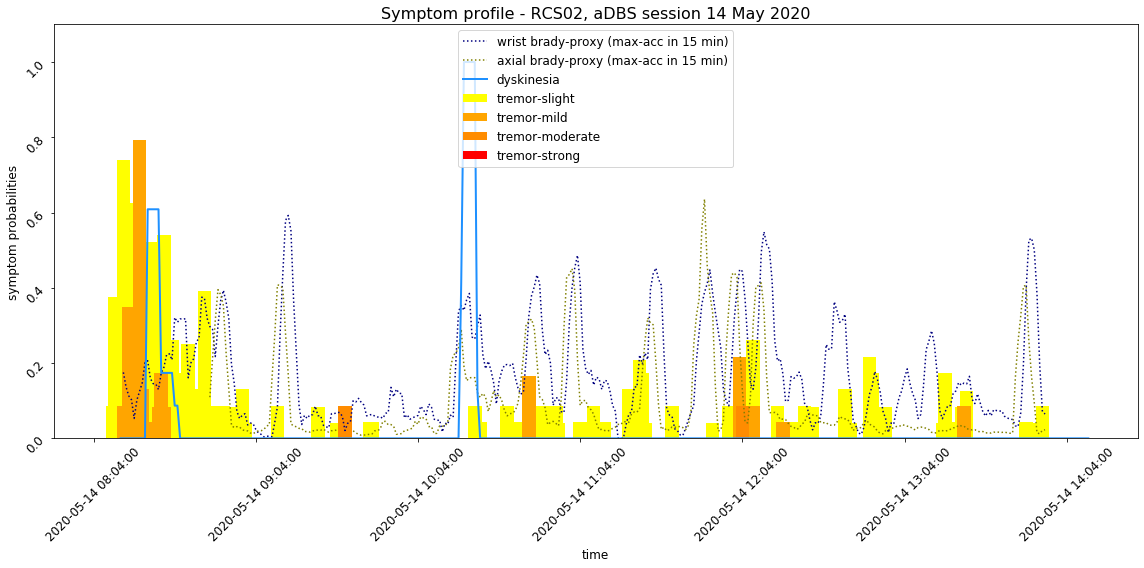

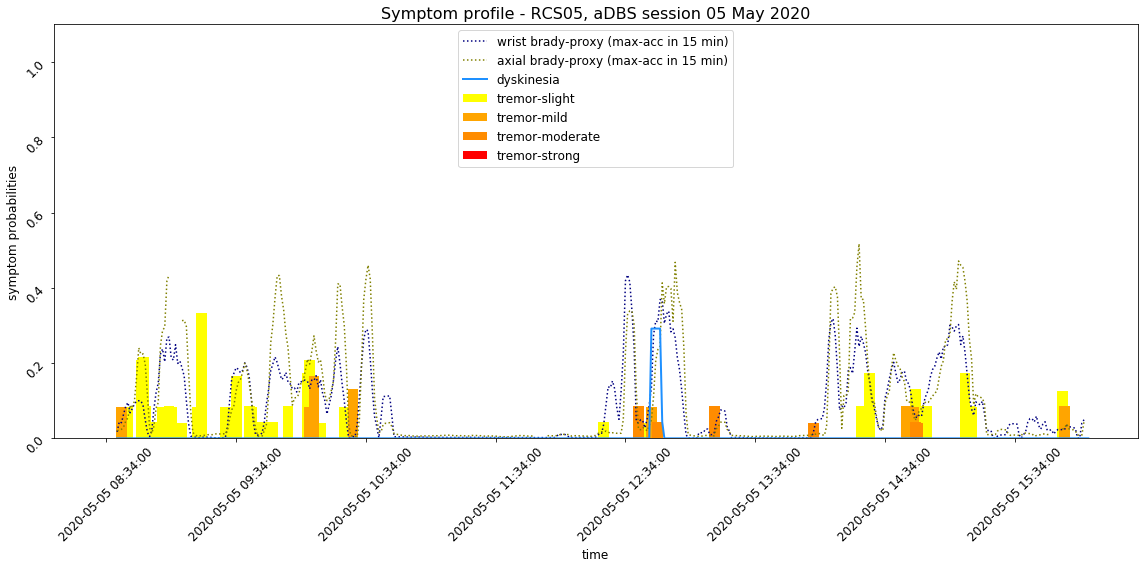

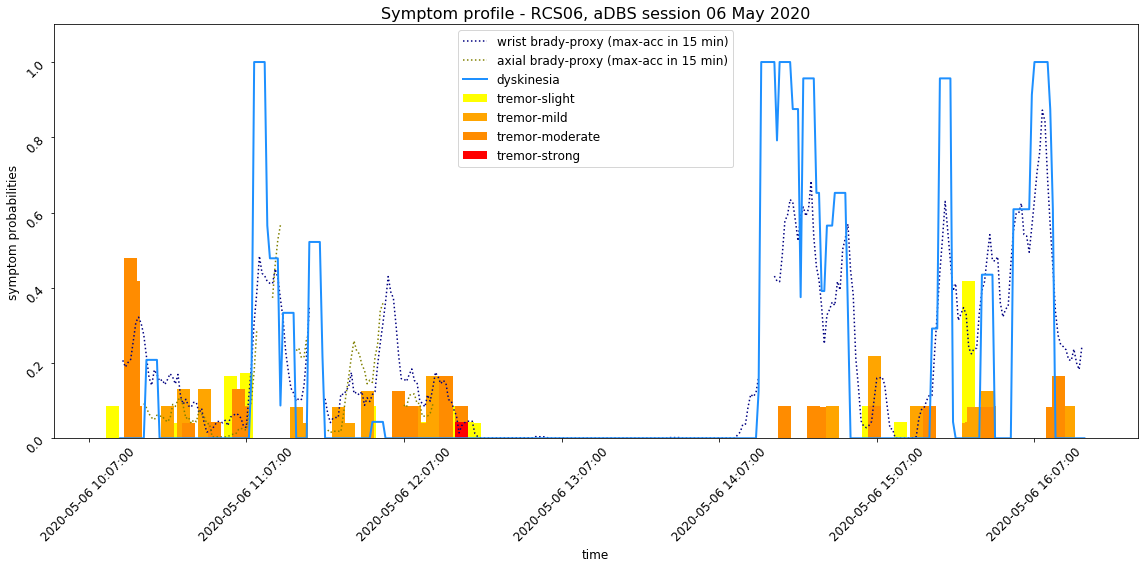

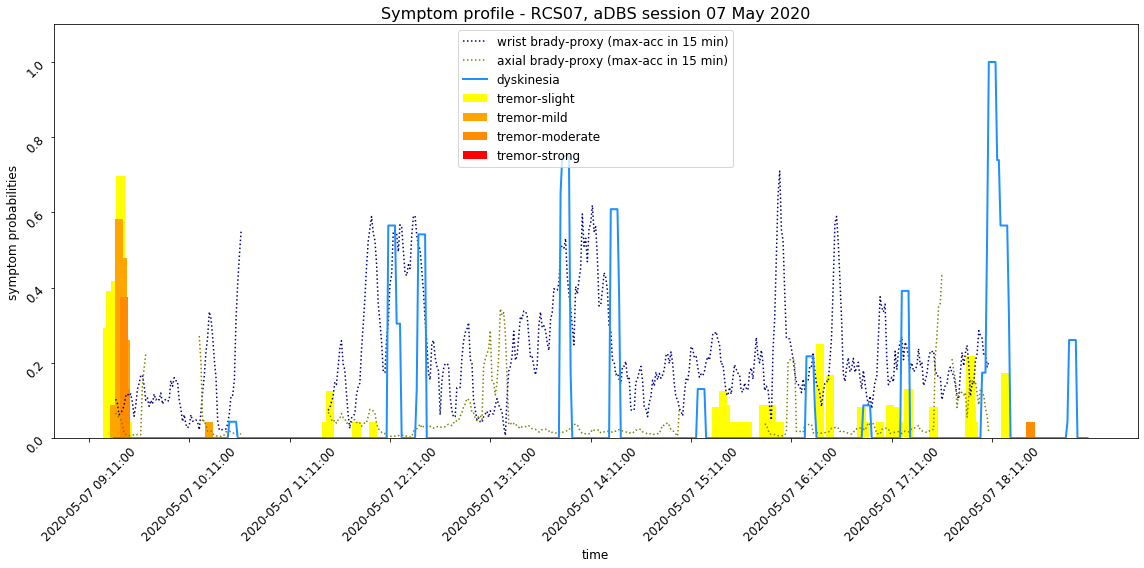

In [16]:
# Combined figures
# symptom profile for Milestones, per patient
data_dir = get_data_download_dir()
mileStoneDays = {'RCS02': '14May', 'RCS05' : '05May', 'RCS06': '06May', 'RCS07': '07May'}


                                               
for pt in ['RCS02','RCS05','RCS06','RCS07']:
    day = mileStoneDays[pt]
    plotData = pd.read_csv('%scombinedMileStoneData_%s.csv' % (data_dir,pt), header=0)

    plt.figure(figsize = (16,8))

    # x-axis
    x_axis = np.arange(plotData.shape[0]) # indices for plotting
    xTicksInd = np.arange(0,plotData.shape[0],60) # indices to show every hour a timestamp
    xTickLabels = plotData['timeStamp']

    # wrist Feat
    wristY = plotData['wrist_Acc'].rolling(window=5).mean() # window is number of sample (minutes), change max/mean
    wristFeatX = np.arange(len(wristY))
    plt.plot(x_axis, wristY, label = 'wrist brady-proxy (max-acc in 15 min)', color = 'navy', linestyle = 'dotted')

    # axial Feat
    axialY = plotData['axial_Acc'].rolling(window=5).mean() # window is number of sample (minutes), change max/mean
    axialFeatX = np.arange(axialY.size)
    plt.plot(x_axis, axialY, label = 'axial brady-proxy (max-acc in 15 min)', color = 'olive', linestyle = 'dotted')


    # dyskinesia
    dysY = plotData['dyskinesia'].rolling(window=5).max() # window is number of sample (minutes), change max/mean
    plt.plot(x_axis, dysY, label = 'dyskinesia', color = 'dodgerblue', linewidth=2)


    # 'stacked bargraph'
    slight = plotData['tremor_slight']
    mild = plotData['tremor_mild']
    moderate = plotData['tremor_moderate']
    strong = plotData['tremor_strong']

    barWidth = 5

    p1 = plt.bar(x_axis, slight, barWidth, color='yellow', label = 'tremor-slight')
    p2 = plt.bar(x_axis, mild, barWidth, color='orange', label = 'tremor-mild')
    p3 = plt.bar(x_axis, moderate,  barWidth,    color='darkorange', label = 'tremor-moderate')
    p4 = plt.bar(x_axis, strong,  barWidth,   color='red', label = 'tremor-strong')

    plt.ylim([0,1.1])
    plt.tick_params(axis='both', labelsize=12, labelrotation=45)
    plt.ylabel('symptom probabilities', fontsize=12)
    plt.xticks(xTicksInd, labels=xTickLabels[xTicksInd])
    plt.xlabel('time', fontsize=12)
    plt.legend(loc='upper center',fontsize=12) #(p1[0], p2[0], p3[0], p4[0]), ('tremor-slight', 'mild', 'moderate', 'strong'), fontsize=10, ncol=4, loc='best',  )

    plt.title('Symptom profile - %s, aDBS session %s %s 2020' % (pt,day[:2], day[2:]), fontsize=16)

    plt.tight_layout()
    plt.savefig('%s%s_Milestone_means5min.png' % (data_dir,pt),dpi=300,)

    plt.show()

    # sources:
    # https://matplotlib.org/3.1.0/gallery/color/named_colors.html


